In [2]:
import numpy as np
from scipy import stats  # same for other sub-modules

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from scipy import io as spio
a = np.ones((3, 3))
spio.savemat('file.mat', {'a': a}) # savemat expects a dictionary
data = spio.loadmat('file.mat', struct_as_record=True)
data['a']

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [5]:
from scipy import misc
misc.imread('images/fname.png')    

# Matplotlib also has a similar function
import matplotlib.pyplot as plt
plt.imread('images/fname.png')

array([[[ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ]],

       [[ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
      

In [6]:
from scipy import linalg
arr = np.array([[1, 2],
                [3, 4]])
linalg.det(arr)

arr = np.array([[3, 2],
                [6, 4]])
linalg.det(arr)

linalg.det(np.ones((3, 4)))


ValueError: expected square matrix

In [7]:
arr = np.array([[1, 2],
                [3, 4]])
iarr = linalg.inv(arr)
iarr


np.allclose(np.dot(arr, iarr), np.eye(2))

True

In [8]:
arr = np.array([[3, 2],
                [6, 4]])
linalg.inv(arr)

LinAlgError: singular matrix

In [9]:
arr = np.arange(9).reshape((3, 3)) + np.diag([1, 0, 1])
uarr, spec, vharr = linalg.svd(arr)

In [10]:
spec
sarr = np.diag(spec)
svd_mat = uarr.dot(sarr).dot(vharr)
np.allclose(svd_mat, arr)

True

In [11]:
time_step = 0.02
period = 5.
time_vec = np.arange(0, 20, time_step)
sig = np.sin(2 * np.pi / period * time_vec) + \
      0.5 * np.random.randn(time_vec.size)

In [12]:
from scipy import fftpack
sample_freq = fftpack.fftfreq(sig.size, d=time_step)
sig_fft = fftpack.fft(sig)

In [13]:
pidxs = np.where(sample_freq > 0)
freqs, power = sample_freq[pidxs], np.abs(sig_fft)[pidxs]
freq = freqs[power.argmax()]

In [14]:
%matplotlib inline

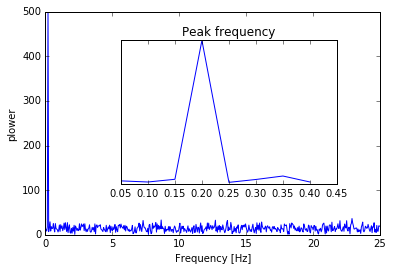

In [15]:
import pylab as plt

plt.figure()
plt.plot(freqs, power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('plower')
axes = plt.axes([0.3, 0.3, 0.5, 0.5])
plt.title('Peak frequency')
plt.plot(freqs[:8], power[:8])
plt.setp(axes, yticks=[])
plt.show()

In [16]:
freq = freqs[power.argmax()]
np.allclose(freq, 1./period)  # check that correct freq is found

True

In [17]:
sig_fft[np.abs(sample_freq) > freq] = 0

In [18]:
main_sig = fftpack.ifft(sig_fft)

/home/kkg8soccer/anaconda/lib/python2.7/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


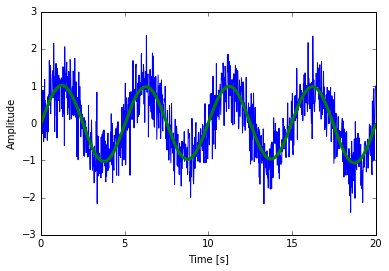

In [19]:
plt.figure()    
plt.plot(time_vec, sig)    
plt.plot(time_vec, main_sig, linewidth=3)    
plt.xlabel('Time [s]')    
plt.ylabel('Amplitude')
plt.show()

/home/kkg8soccer/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:11: RuntimeWarning: divide by zero encountered in divide


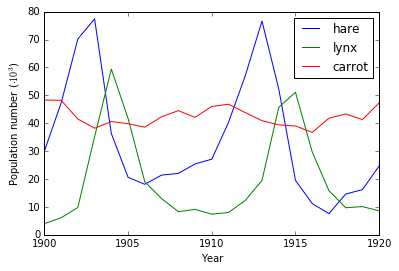

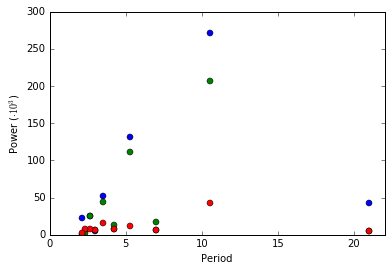

In [20]:
"""
Discover the periods in data/populations.txt
"""

data = np.loadtxt('data/populations.txt')
years = data[:, 0]
populations = data[:, 1:]

ft_populations = np.fft.fft(populations, axis=0)
frequencies = np.fft.fftfreq(populations.shape[0], years[1] - years[0])
periods = 1 / frequencies

plt.figure()
plt.plot(years, populations * 1e-3)
plt.xlabel('Year')
plt.ylabel('Population number ($\cdot10^3$)')
plt.legend(['hare', 'lynx', 'carrot'], loc=1)

plt.figure()
plt.plot(periods, abs(ft_populations) * 1e-3, 'o')
plt.xlim(0, 22)
plt.xlabel('Period')
plt.ylabel('Power ($\cdot10^3$)')

plt.show()

# There's probably a period of around 10 years (obvious from the
# plot), but for this crude a method, there's not enough data to say
# much more.

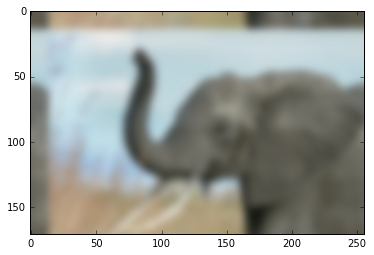

In [21]:
"""
Simple image blur by convolution with a Gaussian kernel
"""

# read image
img = plt.imread('data/elephant.png')

# prepare an 1-D Gaussian convolution kernel
t = np.linspace(-10, 10, 30)
bump = np.exp(-0.1*t**2)
bump /= np.trapz(bump) # normalize the integral to 1

# make a 2-D kernel out of it
kernel = bump[:, np.newaxis] * bump[np.newaxis, :]

# padded fourier transform, with the same shape as the image
kernel_ft = fftpack.fft2(kernel, shape=img.shape[:2], axes=(0, 1))

# convolve
img_ft = fftpack.fft2(img, axes=(0, 1))
img2_ft = kernel_ft[:, :, np.newaxis] * img_ft
img2 = fftpack.ifft2(img2_ft, axes=(0, 1)).real

# clip values to range
img2 = np.clip(img2, 0, 1)

# plot output
plt.imshow(img2)
plt.show()

# Further exercise (only if you are familiar with this stuff):
#
# A "wrapped border" appears in the upper left and top edges of the
# image. This is because the padding is not done correctly, and does
# not take the kernel size into account (so the convolution "flows out
# of bounds of the image").  Try to remove this artifact.


In [22]:
from scipy import optimize

In [23]:
def f(x):
    return x**2 + 10*np.sin(x)

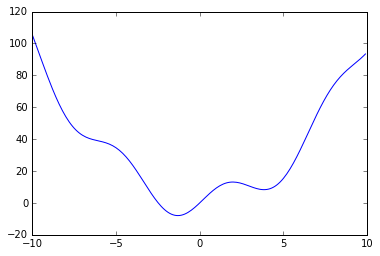

In [24]:
x = np.arange(-10, 10, 0.1)
plt.plot(x, f(x)) 
plt.show()

In [25]:
optimize.fmin_bfgs(f, 0)

Optimization terminated successfully.
         Current function value: -7.945823
         Iterations: 5
         Function evaluations: 24
         Gradient evaluations: 8


array([-1.30644003])

In [26]:
optimize.fmin_bfgs(f, 3, disp=0)

array([ 3.83746663])

In [27]:
optimize.basinhopping(f, 0)

                  nfev: 1719
 minimization_failures: 0
                   fun: -7.945823375615284
                     x: array([-1.30644])
               message: ['requested number of basinhopping iterations completed successfully']
                  njev: 573
                   nit: 100

In [28]:
xmin_local = optimize.fminbound(f, 0, 10)
xmin_local

3.8374671194983834

In [29]:
root = optimize.fsolve(f, 1)  # our initial guess is 1
root

array([ 0.])

In [30]:
root2 = optimize.fsolve(f, -2.5)
root2

array([-2.47948183])

In [31]:
xdata = np.linspace(-10, 10, num=20)
ydata = f(xdata) + np.random.randn(xdata.size)

In [32]:
def f2(x, a, b):
    return a*x**2 + b*np.sin(x)

In [33]:
guess = [2, 2]
params, params_covariance = optimize.curve_fit(f2, xdata, ydata, guess)
params


array([  1.00316566,  10.44434005])

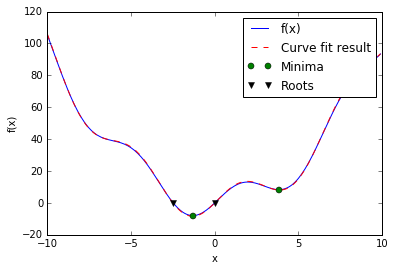

In [34]:
grid = (-10, 10, 0.1)
xmin_global = optimize.brute(f, (grid,))
xmin_local = optimize.fminbound(f, 0, 10)
root = optimize.fsolve(f, 1)  # our initial guess is 1
root2 = optimize.fsolve(f, -2.5)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, f(x), 'b-', label="f(x)")
ax.plot(x, f2(x, *params), 'r--', label="Curve fit result")
xmins = np.array([xmin_global[0], xmin_local])
ax.plot(xmins, f(xmins), 'go', label="Minima")
roots = np.array([root, root2])
ax.plot(roots, f(roots), 'kv', label="Roots")
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.show()

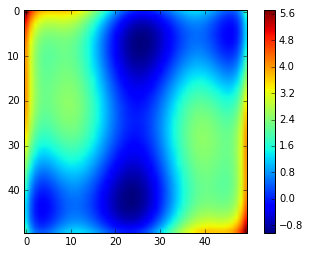

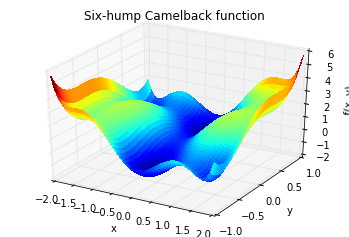

In [36]:
from mpl_toolkits.mplot3d import Axes3D


def sixhump(x):
    return (4 - 2.1*x[0]**2 + x[0]**4 / 3.) * x[0]**2 + x[0] * x[1] + (-4 + \
        4*x[1]**2) * x[1] **2

x = np.linspace(-2, 2)
y = np.linspace(-1, 1)
xg, yg = np.meshgrid(x, y)

plt.figure()  # simple visualization for use in tutorial
plt.imshow(sixhump([xg, yg]))
plt.colorbar()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xg, yg, sixhump([xg, yg]), rstride=1, cstride=1,
                       cmap=plt.cm.jet, linewidth=0, antialiased=False)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Six-hump Camelback function')

plt.show()